# Backmapping of polyethylene chain

Author: Jakub Krajniak

Date: 27.10.2015

## Model

75 of $PE_{100}$ with density around $800 \; kg/m^3$

Atomistic modele: OPLS/UA

Coarse-grained model: The iterative Boltzmann Method used via VOTCA package. Two segments $CH_2$ are grouped into single CG bead. 

## Remarks
This IPython notebook was used to create all graphs in the publication.

In [4]:
import os
from matplotlib import pyplot as plt
from pylab import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from collections import defaultdict
sns.set(style='ticks', palette='Set2')
dt = 0.001

def smooth(x,window_len=11,window='hanning'):
        if x.ndim != 1:
                raise ValueError("smooth only accepts 1 dimension arrays.")
        if x.size < window_len:
                raise ValueError("Input vector needs to be bigger than window size.")
        if window_len<3:
                return x
        if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
                raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
        s=numpy.r_[2*x[0]-x[window_len-1::-1],x,2*x[-1]-x[-1:-window_len:-1]]
        if window == 'flat': #moving average
                w=numpy.ones(window_len,'d')
        else:  
                w=eval('numpy.'+window+'(window_len)')
        y=numpy.convolve(w/w.sum(),s,mode='same')
        return y[window_len:-window_len+1]
%matplotlib inline
import numpy

In [5]:
# configuration of csv columns
csv_cols = {'time': 1,
            'T': 2, 
            'Ek': 3,
            'res': 4,
            'lj': 5, 
            'bond_at': 6, 
            'bond_cg': 7,
            'bond_cross': 8,
            'bond_cross_2': 9,
            'angle_1': 10,
            'angle_2': 11,
            'angle_3': 12,
            'dih_1': 13, 
            'dih_2': 14,
            '14lj-1': 15,
            '14lj-2': 16,
            'Epot': (5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16),
            'LJ': (5, 15, 16),
            'bonds': (6, 7, 8, 9),
            'angles': (10, 11, 12),
            'dihedrals': (13, 14)
           }
ref_cols = {'time': 1,
            'T': 2, 
            'Ek': 3, 
            'lj': 4, 
            'bond': 5, 
            'angle': 6,
            'dih': 7, 
            '14lj-1': 8, 
            '14lj-2':9,
            'Epot': (4, 5, 6, 7, 8, 9),
            'LJ': (4, 8, 9)
           }

In [6]:
RT = 8.314 * 423.0 * 10**-3
print(RT)

3.5168220000000003


In [7]:
ref_data = np.loadtxt('speed_data/ref_aa.csv', skiprows=1)
ref_data[:, 4:] = ref_data[:, 4:] / (75*100*RT)
std_ref_data = np.std(ref_data, ddof=0, axis=0)
# Load all .csv files
data = {
    (float(k.split('_')[1]), k.split('_')[0]): np.loadtxt('speed_data/{}'.format(k), skiprows=1) 
    for k in os.listdir('speed_data') if k.startswith('sim')
}
res_data = defaultdict(list)
for r, f in data:
    data[(r, f)][:, 4:] = data[(r, f)][:, 4:] / (75*100*RT)
    res_data[r].append(data[(r, f)])

KeyboardInterrupt: 

In [7]:
dt = 0.001

In [8]:
# Makes averages and calculates std.
avg_res_data, std_res_data = {}, {}  # indexed by alpha value
for r in res_data:
    avg_res_data[r] = np.average(res_data[r], axis=0)
    std_res_data[r] = np.std(res_data[r], axis=0, ddof=1)

print('Cols={}'.format(list(enumerate(open('speed_data/sim0energy_0.0005_.csv').readline().split()))))
print('Ref Cols={}'.format(list(enumerate(open('speed_data/ref_aa.csv').readline().split()))))

Cols=[(0, 'step'), (1, 'time'), (2, 'T'), (3, 'Ekin'), (4, 'res'), (5, 'lj'), (6, 'bond_123'), (7, 'bond_125_cross'), (8, 'bond_123_cross'), (9, 'bond_124_cross'), (10, 'angle_251_cross'), (11, 'angle_252_cross'), (12, 'angle_250_cross'), (13, 'dihedral_190_cross'), (14, 'dihedral_191_cross'), (15, 'lj-14_0_cross'), (16, 'lj-14_1_cross')]
Ref Cols=[(0, 'step'), (1, 'time'), (2, 'T'), (3, 'Ekin'), (4, 'lj'), (5, 'bond_123'), (6, 'angle_250'), (7, 'dihedral_190'), (8, 'lj-14_0'), (9, 'lj-14_1')]


In [11]:
rcParams['figure.figsize'] = 17, 8
orig_values = {x: v for x, v in rcParams.items() if 'size' in x}
rcParams.update({'font.size': 12, 
                 'legend.fontsize': 16, 
                 'axes.titlesize': 16,
                 'axes.labelsize': 16,
                 'xtick.labelsize': 12, 
                 'ytick.labelsize': 12,
                 })
res2color = {
    0.00001: 0,
    0.00002: 1,
    0.00003: 2,
    0.00004: 3,
    0.00005: 4,
    0.00006: 19,
    0.00008: 5,
    0.00009: 15,
    0.0001: 6,
    0.0002: 7,
    0.0003: 8,
    0.0004: 9,
    0.0005: 10,
    0.0007: 17,
    0.0008: 11,
    0.0009: 16,
    0.001: 12,
    0.002: 14,
    'aa': 13
    }

plot_colors = np.array([
    (197,27,125),
    (31, 120, 180),
    (178, 223, 138),
    (51, 160, 44),
    (251, 154, 153),
    (227, 26, 28),  # 5
    (253, 191, 111),
    (255, 127, 0),
    (202, 178, 214),
    (106, 61, 154),
    (166,86,40), # 10
    (177, 89, 40), ## color palet 
    (57, 106, 177), 
    (118,42,131), # 13
    (104, 37, 41), 
    (83, 81, 84), 
    (107, 76, 154),
    (146, 36, 40),
    (148, 139, 61),
    (137, 61, 57),
    ]) / 255.0
fonttitle=16
fontother=12

test2res = {
    'test_1': 0.00001,
    'test_2': 0.00005,
    'test_3': 0.0005,
    'test_4': 0.001,
    'ref': 'aa'
}


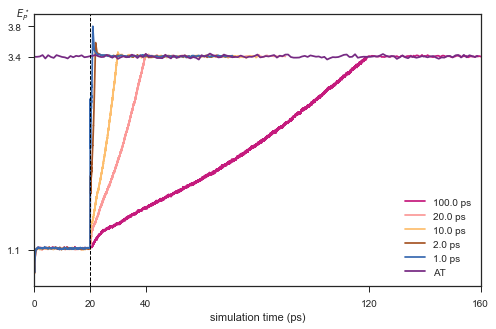

In [13]:
valid_res = [1e-05, 5e-05, 0.0001, 0.0005, 0.001]

rcParams['figure.figsize'] = 8, 5

# Potential energy
plt.annotate(r'$E_P^\star$',  xy=(-0.01, 0.99),  xycoords='axes fraction', horizontalalignment='right')

yticks = []
y_max = 0.0
for r in valid_res:
    data = np.sum(avg_res_data[r][:, csv_cols['Epot']], axis=1)
    plt.plot(avg_res_data[r][:,0]*dt,  data, color=plot_colors[res2color[r]],
             label='{} ps'.format(dt/r).rstrip('0'))
    y_max = max(y_max, np.max(data))

yticks.append(y_max)
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['Epot']], axis=1)[:100]))

plt.xlim(0, 160)
ref_data_epot = np.sum(ref_data[:, ref_cols['Epot']][200:360], axis=1)
yticks.append(np.average(ref_data_epot))
plt.plot(
    ref_data[:, 0][:160]*dt, 
    ref_data_epot,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.xticks([
        0.0,
        20.0,
        20.0 + dt/0.00001,
        20.0 + dt/0.00005,
        160.0
    ])
plt.yticks(yticks, map(r'{:.1f}'.format, yticks))
plt.legend(loc=0)#, title=r'$\Delta t / \alpha$')
plt.xlabel('simulation time (ps)')
plt.savefig('pe_energy.pdf', dpi=300, bbox_inches='tight')
plt.savefig('pe_energy.png', dpi=300, bbox_inches='tight')

In [9]:
# Reference values for total potential energy
print 'Reference values'
print 'avg=', np.average(np.sum(ref_data[:, ref_cols['Epot']], axis=1))
print 'std=', np.std(np.sum(ref_data[:, ref_cols['Epot']], axis=1), ddof=1)
print 'std error=', np.std(np.sum(ref_data[:, ref_cols['Epot']], axis=1), ddof=1)/np.sqrt(np.sum(ref_data[:, ref_cols['Epot']], axis=1).shape[0] - 1)

Reference values
avg= 3.40168406925
std= 0.0135535318992
std error= 0.000135535318992


In [10]:
## Average value for potential energy
print('Average value of potential energy for different resolution in the CG region')
avg_pot = []
for r in avg_res_data:
    avg_pot.append(np.average(np.sum(avg_res_data[r][:, csv_cols['Epot']][:200], axis=1)))
    print 'res=', dt/r, 'avg cg=', np.average(np.sum(avg_res_data[r][:, csv_cols['Epot']][:200], axis=1)), 'std=', np.sqrt(np.sum(std_res_data[r][:, csv_cols['Epot']][:200]**2))
print np.average(avg_pot), np.std(avg_pot)

avg_pot = []
print('\nAverage value of potential energy for different resolution after backmapping')
for r in avg_res_data:
    avg_pot.append(np.average(np.sum(avg_res_data[r][:, csv_cols['Epot']][-101:], axis=1)))
    print 'res=', dt/r, 'avg aa=', np.average(np.sum(avg_res_data[r][:, csv_cols['Epot']][-101:], axis=1)), 'std=', np.sqrt(np.sum(std_res_data[r][:, csv_cols['Epot']][-101:]**2))
print np.average(avg_pot), np.std(avg_pot)

Average value of potential energy for different resolution in the CG region
res= 25.0 avg cg= 1.13543940381 std= 0.141657107311
res= 3.33333333333 avg cg= 1.13740196523 std= 0.144530593618
res= 100.0 avg cg= 1.14522172594 std= 0.136360557369
res= 11.1111111111 avg cg= 1.13631117417 std= 0.141706215918
res= 2.5 avg cg= 1.13522888269 std= 0.142919678281
res= 1.0 avg cg= 1.143281724 std= 0.147867610587
res= 2.0 avg cg= 1.14283182032 std= 0.149307508703
res= 5.0 avg cg= 1.13479858444 std= 0.141054344205
res= 1.11111111111 avg cg= 1.13689089231 std= 0.135258975532
res= 16.6666666667 avg cg= 1.13543940381 std= 0.141657107311
res= 12.5 avg cg= 1.13546098281 std= 0.139331533372
res= 50.0 avg cg= 1.13592081217 std= 0.138285082878
res= 33.3333333333 avg cg= 1.13590698752 std= 0.139978811757
res= 1.42857142857 avg cg= 1.1372913231 std= 0.139697034226
res= 1.66666666667 avg cg= 1.1372913231 std= 0.139697034226
res= 1.25 avg cg= 1.13703979696 std= 0.139126827189
res= 10.0 avg cg= 1.13900849716 std=

In [11]:
# Temperature
print('Reference values of temperature')
print('T avg={}'.format(np.average(ref_data[:, ref_cols['T']])/0.0083144621))
print('T std={}'.format(np.std(ref_data[:, ref_cols['T']])/0.0083144621))

print('\nAverage temperature in CG region')
for r in avg_res_data:
    print r, 'T_cg avg=', np.average(avg_res_data[r][:, csv_cols['T']][:200])/0.0083144621, 'std=', np.sqrt(np.sum((std_res_data[r][:, csv_cols['T']][:200]/0.0083144621)**2))

print('\nAverage temperature in AT region')
for r in avg_res_data:
    print r, 'T_AT avg=', np.average(avg_res_data[r][:, csv_cols['T']][-100:])/0.0083144621, 'std=', np.sqrt(np.sum((std_res_data[r][:, csv_cols['T']][-100:]/0.0083144621)**2))



Reference values of temperature
T avg=422.968925445
T std=4.01535887604

Average temperature in CG region
4e-05 T_cg avg= 422.557126395 std= 55.15315761
0.0003 T_cg avg= 422.506479704 std= 57.5789578458
1e-05 T_cg avg= 422.446829122 std= 58.0760183645
9e-05 T_cg avg= 422.534877512 std= 58.1654627261
0.0004 T_cg avg= 422.745781113 std= 55.9202992012
0.001 T_cg avg= 422.655694107 std= 52.6698602619
0.0005 T_cg avg= 422.70546281 std= 57.5298859471
0.0002 T_cg avg= 422.504411019 std= 55.4442451922
0.0009 T_cg avg= 422.835995909 std= 57.7237561552
6e-05 T_cg avg= 422.557126395 std= 55.15315761
8e-05 T_cg avg= 422.467227315 std= 53.9085544696
2e-05 T_cg avg= 422.541272995 std= 54.9457163066
3e-05 T_cg avg= 422.813975543 std= 55.3857011089
0.0007 T_cg avg= 422.734421388 std= 56.7864634365
0.0006 T_cg avg= 422.734421388 std= 56.7864634365
0.0008 T_cg avg= 422.69912145 std= 55.4440557051
0.0001 T_cg avg= 422.734743117 std= 58.3509313849
5e-05 T_cg avg= 422.637388653 std= 56.1500882476
0.002 T_c

### Supportive material - contribution to total potential energy

In [12]:
valid_res = sorted(test2res.values())
valid_res.remove('aa')

In [13]:
valid_res

[1e-05, 5e-05, 0.0005, 0.001]

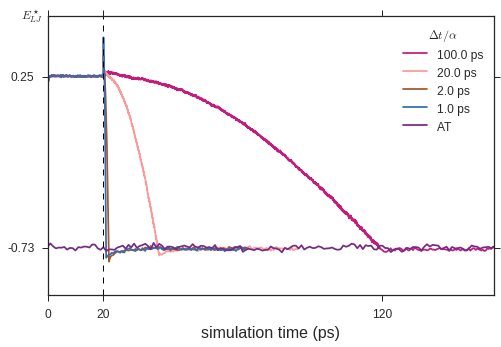

In [14]:
rcParams['figure.figsize'] = 8, 5

# LJ
yticks = []
plt.annotate(r'$E_{LJ}^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
for r in valid_res:
    data = np.sum(avg_res_data[r][:, csv_cols['LJ']], axis=1)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['LJ']], axis=1)[:100]))
ref_data_lj = np.sum(ref_data[:, ref_cols['LJ']][200:400], axis=1)

yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=160)
#plt.ylim([-6, 1])
plt.xticks([0.0, 20.0, 20.0+dt/0.00001])
plt.xlabel('simulation time (ps)')
plt.legend(
    fontsize=fontother, 
    bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', title=r'$\Delta t / \alpha$')
plt.savefig('pe_lj_change.pdf', dpi=300, bbox_inches='tight')

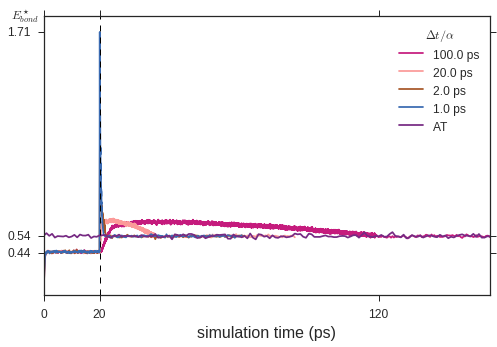

In [15]:
# Bond
yticks = []
plt.annotate(r'$E_{bond}^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
max_y = 0.0
increase_min_max = []
for r in valid_res:
    data = np.sum(avg_res_data[r][:, csv_cols['bonds']], axis=1)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
    increase_min_max.append([r, np.max(data) - np.min(data)])
    max_y = max(max_y, np.max(data))
    
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['bonds']], axis=1)[:100]))
yticks.append(max_y)

ref_data_lj = ref_data[:, ref_cols['bond']][200:400]
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )

plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=160)
plt.xticks([0.0, 20.0, 20.0+dt/0.00001])
plt.xlabel('simulation time (ps)')
plt.legend(fontsize=fontother, bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', title=r'$\Delta t / \alpha$')
plt.savefig('pe_bond_change.pdf', dpi=300, bbox_inches='tight')

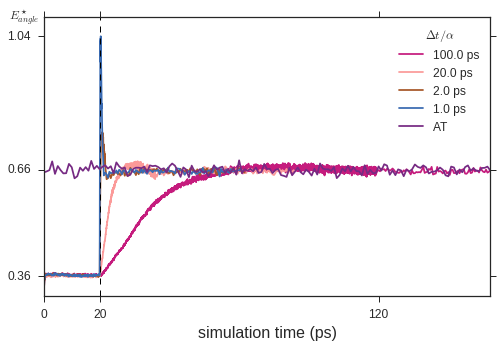

In [16]:
# Angle
yticks = []
plt.annotate(r'$E_{angle}^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
max_y = 0.0
for r in valid_res:
    data = np.sum(avg_res_data[r][:, csv_cols['angles']], axis=1)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
    max_y = max(max_y, np.max(data))
    
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['angles']], axis=1)[:100]))
yticks.append(max_y)

ref_data_lj = ref_data[:, ref_cols['angle']][200:400]
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )

plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=160)
#plt.ylim(ymax=4.7)
plt.xticks([0.0, 20.0, 20.0+dt/0.00001])
plt.xlabel('simulation time (ps)')
lgd = plt.legend(fontsize=fontother, bbox_to_anchor=(1.0, 1.0), ncol=1, loc='upper right', 
                 title=r'$\Delta t / \alpha$')
plt.savefig('pe_angle_change.pdf', dpi=300, bbox_inches='tight')

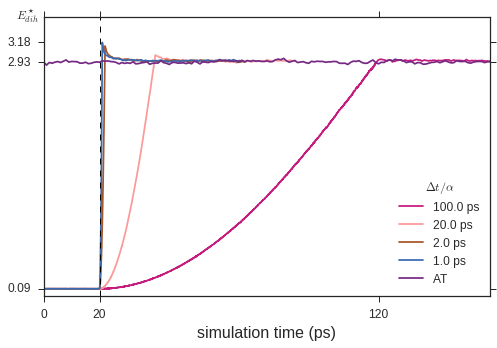

In [17]:
# Dihedral
yticks = []
plt.annotate(r'$E_{dih}^\star$', xy=(-0.01, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')
max_y = 0.0
for r in valid_res:
    data = np.sum(avg_res_data[r][:, csv_cols['dihedrals']], axis=1)
    plt.plot(
        avg_res_data[r][:,0]*dt, 
        data, 
        color=plot_colors[res2color[r]],
        label='{} ps'.format(dt/r))
    max_y = max(max_y, np.max(data))
    
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['dihedrals']], axis=1)[:100]))
yticks.append(max_y)

ref_data_lj = ref_data[:, ref_cols['dih']][200:400]
yticks.append(np.average(ref_data_lj))
plt.plot(
    ref_data[:, 0][:200]*dt, 
    ref_data_lj,
    color=plot_colors[res2color['aa']],
    label='AT'
    )

plt.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
plt.yticks(yticks, map('{:.2f}'.format, yticks))
plt.xlim(xmax=160)
plt.xticks([0.0, 20.0, 20.0+dt/0.00001])
plt.xlabel('simulation time (ps)')
lgd = plt.legend(fontsize=fontother, ncol=1, loc='best', title=r'$\Delta t / \alpha$')
plt.savefig('pe_dih_change.pdf', dpi=300, bbox_inches='tight')

#### CG potentials



In [18]:
cg_dir = 'cg_ibi/'
cg_files = {f: np.loadtxt(os.path.join(cg_dir, f), usecols=(0, 1)) for f in os.listdir(cg_dir)}

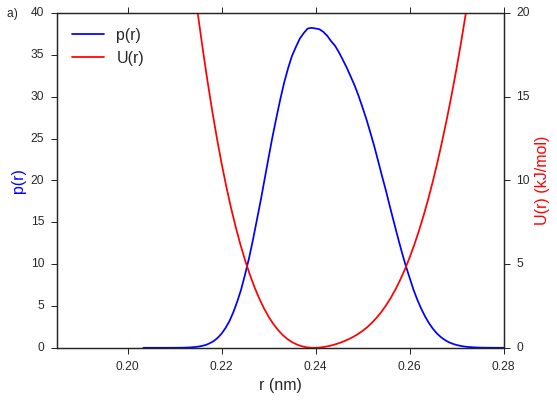

In [19]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['bond.hist'][:, 0], cg_files['bond.hist'][:, 1], 'b', label='p(r)')
ax1.set_xlabel('r (nm)')
ax1.set_ylabel('p(r)', color='b')
ax1.set_xlim([0.2, 0.28])

ax1.annotate(r'a) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax2 = ax1.twinx()
lns2 = ax2.plot(cg_files['table_b1.xvg'][:, 0], cg_files['table_b1.xvg'][:, 1], 'r', label='U(r)')
ax2.set_ylim([0, 20])
ax2.set_xlim([0.185, 0.28])
ax2.set_ylabel('U(r) (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2)
fig.savefig('pe_cg_ibi_bonded.pdf', dpi=300, bbox_inches='tight')

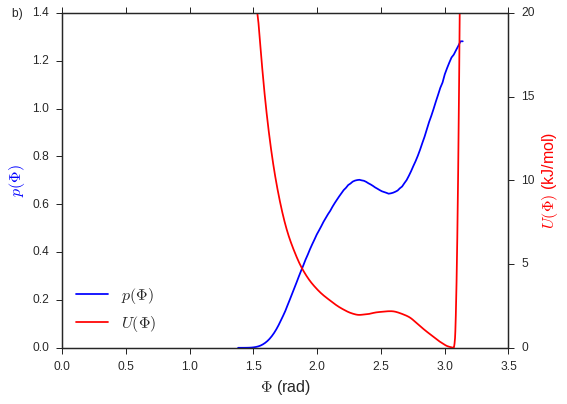

In [20]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['angle_ch2.hist'][:, 0], cg_files['angle_ch2.hist'][:, 1], 'b', label=r'$p(\Phi)$')
ax1.set_xlabel(r'$\Phi$ (rad)')
ax1.set_ylabel(r'$p(\Phi)$', color='b')

ax1.annotate(r'b) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax1b = ax1.twinx()
lns2 = ax1b.plot(np.deg2rad(cg_files['table_a1.xvg'][:, 0]), cg_files['table_a1.xvg'][:, 1], 'r', label=r'$U(\Phi)$')
ax1b.set_ylim([0, 20])
ax1b.set_ylabel(r'$U(\Phi)$ (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1b.legend(lns, labs, loc=3)

fig.savefig('pe_cg_ibi_angles.pdf', dpi=300, bbox_inches='tight')

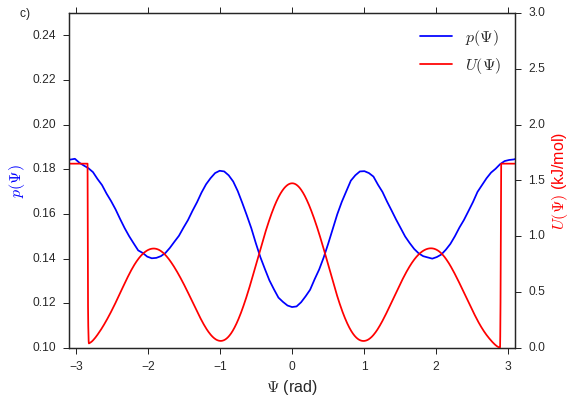

In [21]:
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['dihedral.hist'][:, 0], cg_files['dihedral.hist'][:, 1], 'b', label=r'$p(\Psi)$')
ax1.set_xlabel(r'$\Psi$ (rad)')
ax1.set_ylabel(r'$p(\Psi)$', color='b')
ax1.set_ylim([0.1, 0.25])

ax1.annotate(r'c) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

# And plot the potential
ax1b = ax1.twinx()
lns2 = ax1b.plot(np.deg2rad(cg_files['table_d1.xvg'][:, 0]), cg_files['table_d1.xvg'][:, 1], 'r', label=r'$U(\Psi)$')
ax1b.set_ylim([0, 3])
ax1b.set_xlim([-3.1, 3.1])
ax1b.set_ylabel(r'$U(\Psi)$ (kJ/mol)', color='r')

# added these three lines
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1b.legend(lns, labs, loc=1)

fig.savefig('pe_cg_ibi_dih.pdf', dpi=300, bbox_inches='tight')

##### non-bonded

/home/teodor/.local/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


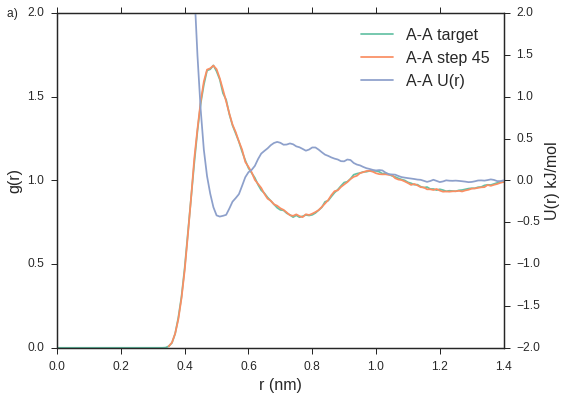

In [22]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['A-A.dist.tgt'][:, 0], cg_files['A-A.dist.tgt'][:, 1], color=next(palette), 
                label='A-A target')
lns2 = ax1.plot(cg_files['A-A.dist.new'][:, 0], cg_files['A-A.dist.new'][:, 1], color=next(palette), 
                label='A-A step 45')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'a) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['A-A.pot.new'][:, 0], cg_files['A-A.pot.new'][:, 1], color=next(palette), 
                label='A-A U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('pe_cg_ibi_A_A.pdf', dpi=300, bbox_inches='tight')

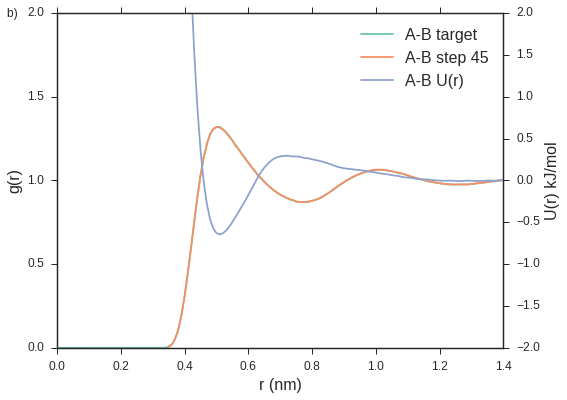

In [23]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['A-B.dist.tgt'][:, 0], cg_files['A-B.dist.tgt'][:, 1], color=next(palette), 
                label='A-B target')
lns2 = ax1.plot(cg_files['A-B.dist.new'][:, 0], cg_files['A-B.dist.new'][:, 1], color=next(palette), 
                label='A-B step 45')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'b) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['A-B.pot.new'][:, 0], cg_files['A-B.pot.new'][:, 1], color=next(palette), 
                label='A-B U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('pe_cg_ibi_A_B.pdf', dpi=300, bbox_inches='tight')

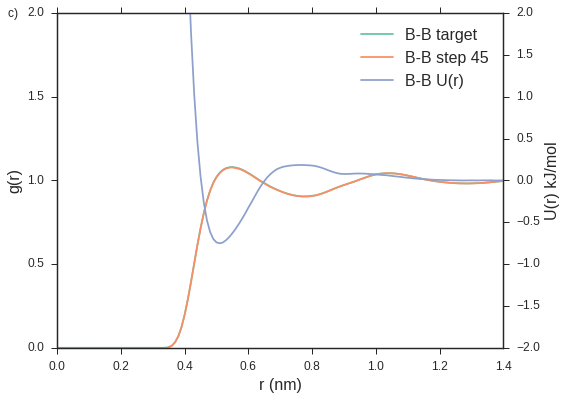

In [24]:
import itertools
plt.rcParams['figure.figsize'] = (8, 6)
palette = itertools.cycle(sns.color_palette())
fig, ax1 = plt.subplots()
lns1 = ax1.plot(cg_files['B-B.dist.tgt'][:, 0], cg_files['B-B.dist.tgt'][:, 1], color=next(palette), 
                label='B-B target')
lns2 = ax1.plot(cg_files['B-B.dist.new'][:, 0], cg_files['B-B.dist.new'][:, 1], color=next(palette), 
                label='B-B step 45')
ax1.set_xlim([0.0, 1.4])
ax1.set_ylim([0.0, 2.0])
ax1.set_ylabel('g(r)')
ax1.set_xlabel('r (nm)')

ax1.annotate(r'c) ', xy=(-0.08, 0.99),  
             xycoords='axes fraction', horizontalalignment='right')

ax2 = ax1.twinx()
lns3 = ax2.plot(cg_files['B-B.pot.new'][:, 0], cg_files['B-B.pot.new'][:, 1], color=next(palette), 
                label='B-B U(r)')
ax2.set_ylabel('U(r) kJ/mol')
ax2.set_ylim([-2, 2])
ax2.set_xlim([0.0, 1.4])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=1)
fig.savefig('pe_cg_ibi_B_B.pdf', dpi=300, bbox_inches='tight')

# Test two histograms

In [14]:
def chi_square(dist_1, dist_2):
    sub = dist_1[:, 1] - dist_2[:, 1]
    sub = sub*sub
    T = sub/(dist_1[:, 1]+dist_2[:, 1])
    return np.nansum(T)

In [15]:
def chi_square_shape(dist_1, dist_2):
    Nu = np.sum(dist_1[:, 1])
    Nv = np.sum(dist_2[:, 1])
    u = dist_1[:, 1]/Nu
    v = dist_2[:, 1]/Nv
    T = np.power(u-v, 2)/(u+v)
    return np.nansum(T)

In [32]:
def square_diff(dist_1, dist_2):
    diff = dist_1 - dist_2
    return np.sum(np.power(diff, 2))

In [17]:
def ks_test(cdf1, cdf2):
    """Kolmogorov-Smirnov two sample test"""
    distance = np.max(cdf1 - cdf2)
    N = len(cdf1)
    M = len(cdf2)
    pref = np.sqrt((N*M) / (M+N))
    c_a = 1.36  # c(0.005)
    accept_null = distance < c_a*pref#  /np.sqrt(N)
    return pref, distance, accept_null

In [18]:
def ecf(histogram, bins, normalize=False):
    """Computes empirical cumulative distribution with given bins"""
    if normalize:
        n = sum(histogram)
    else:
        n = 1.0
    return np.array([np.sum([y for x, y in histogram if x < xl]) for xl in bins]) / n

## Structural properties

In [28]:
struct_data = {}
fnam = ['A-A', 'bond', 'angle', 'dihedral']
for f in os.listdir('structural_data/'):
    if os.path.isfile(os.path.join('structural_data', f)) and (f.endswith('xvg') or f.endswith('csv')):
        if any([x in f for x in fnam]):
            struct_data[f] = np.loadtxt(os.path.join('structural_data', f), usecols=(0, 1))

In [29]:
rdf_dir = 'structural_data/rdf'
rdf_data = defaultdict(list)
for f in os.listdir(rdf_dir):
    d = np.loadtxt(os.path.join(rdf_dir, f), usecols=(0, 1))
    if f.startswith('ref'):
        rdf_data['aa'].append(d)
    else:
        t = '_'.join(f.split('_')[:2])
        r = test2res[t]
        rdf_data[r].append(d)

In [30]:
avg_rdf_data = {}
std_rdf_data = {}
for r in rdf_data:
    avg_rdf_data[r] = np.average(rdf_data[r], axis=0)
    std_rdf_data[r] = np.std(rdf_data[r], axis=0)

## Compare of distributions

In [31]:
for r in rdf_data:
    print('AT-{}, f={}'.format(r, square_diff(avg_rdf_data['aa'], avg_rdf_data[r])))

NameError: name 'square_diff' is not defined

In [33]:
x_argmax, y_argmax = np.argmax(avg_rdf_data[r][:55], axis=0)
print(avg_rdf_data[r][y_argmax])

[ 0.49        1.16688333]


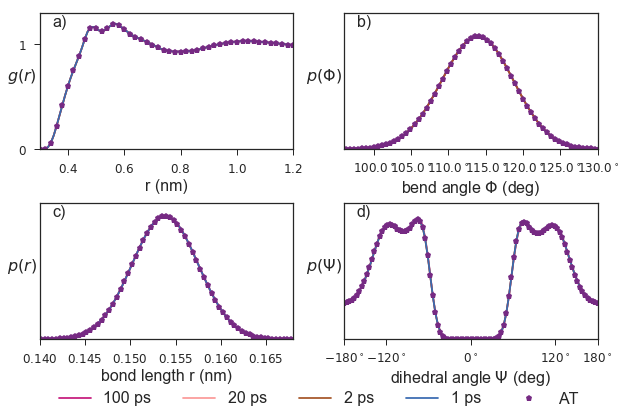

In [43]:
# Structural data
rcParams['figure.figsize'] = 10, 6
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.2, hspace=0.4)
ax1 = fig.add_subplot(gs1[0, 0]) # rdf
ax2 = fig.add_subplot(gs1[1, 0]) # bonds
ax3 = fig.add_subplot(gs1[0, 1]) # angles
ax4 = fig.add_subplot(gs1[1, 1])# dih
# ax5 = fig.add_subplot(gs1[3:, 0])

# RDF
#an_1 = ax1.annotate('a)', xy=(-0.01, 1.0),  xycoords='axes fraction', horizontalalignment='right')
# for f in struct_data:
#     t = f.split('.')[-2]
#     if 'A-A' in f and 'test' in f:
#         ax1.plot(struct_data[f][:, 0], struct_data[f][:, 1],
#                  color=plot_colors[res2color[test2res[t]]])
# ax1.plot(struct_data['A-A.l20.xvg'][:, 0], struct_data['A-A.l20.xvg'][:, 1], 'p',
#          color=plot_colors[res2color['aa']])
an_1 = ax1.annotate(r'$g(r)$', xy=(-0.01, 0.5),  xycoords='axes fraction', fontsize=fonttitle, horizontalalignment='right')
an_11 = ax1.annotate('a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
for r, d in avg_rdf_data.items():
    if r == 'aa':
        continue
    ax1.plot(d[:, 0], d[:, 1], color=plot_colors[res2color[r]])
ax1.plot(avg_rdf_data['aa'][:, 0], avg_rdf_data['aa'][:, 1], 'p', color=plot_colors[res2color['aa']], markevery=2)
ax1.tick_params(axis='both', which='major')
ax1.set_yticks([0.0, 1.0])
ax1.set_xlim([0.3, 1.2])
ax1.set_ylim([0.0, 1.3])
ax1.set_xticklabels(map(r'${:.1f}$'.format, ax1.get_xticks()))
ax1.set_yticklabels(map(r'${:.0f}$'.format, ax1.get_yticks()))
ax1.set_xlabel(r'r (nm)')

# Bonds
an_2 = ax2.annotate(r'$p(r)$', xy=(-0.01, 0.5),  xycoords='axes fraction', fontsize=fonttitle, 
                    horizontalalignment='right')
an_21 = ax2.annotate('c)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
for f in struct_data:
    t = '_'.join(f.split('_')[1:]).replace('.xvg', '')
    if 'bond' in f and 'test' in f:
        ax2.plot(struct_data[f][:, 0], struct_data[f][:, 1],
                 color=plot_colors[res2color[test2res[t]]])
ax2.plot(struct_data['bond_ref.xvg'][:, 0], struct_data['bond_ref.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax2.set_xlim(0.140, 0.168)
ax2.set_ylim([0, 120])
ax2.tick_params(axis='both', which='major')
ax2.set_yticks([])
ax2.set_xlabel(r'bond length r (nm)')
ax2.set_yticklabels(map(r'${:.0f}$'.format, ax2.get_yticks()))
ax2.set_xticklabels(map(r'${:.3f}$'.format, ax2.get_xticks()))

# Angles
an_3 = ax3.annotate(r'$p(\Phi)$', xy=(-0.01, 0.5),  
                    xycoords='axes fraction', fontsize=fonttitle, horizontalalignment='right')
an_31 = ax3.annotate('b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
for f in struct_data:
    t = '_'.join(f.split('_')[1:]).replace('.xvg', '')
    if 'angle' in f and 'test' in f:
        ax3.plot(np.rad2deg(struct_data[f][:, 0]), struct_data[f][:, 1]/57.2958,
                 color=plot_colors[res2color[test2res[t]]])
ax3.plot(np.rad2deg(struct_data['angle_ref.xvg'][:, 0]), struct_data['angle_ref.xvg'][:, 1]/57.2958, 'p',
                    color=plot_colors[res2color['aa']])
ax3.set_yticks([])
ax3.set_xlim([96, 130])
ax3.set_ylim([0, 0.1])
ax3.tick_params(axis='both', which='major')
ax3.set_yticklabels(map(r'${}$'.format, ax3.get_yticks()))
ax3.set_xticklabels(map(r'${}^\circ$'.format, ax3.get_xticks()))
ax3.set_xlabel(r'bend angle $\Phi$ (deg)')

# Dihedral
an_4 = ax4.annotate(r'$p(\Psi)$', xy=(-0.01, 0.5),  xycoords='axes fraction', 
                    fontsize=fonttitle, horizontalalignment='right')
an_41 = ax4.annotate('d)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
for f in sorted(struct_data):
    t = '_'.join(f.split('_')[1:]).replace('.xvg', '')
    if 'dih' in f and 'test' in f:
        ax4.plot(np.rad2deg(struct_data[f][:, 0]), struct_data[f][:, 1]/57.2958,
                 color=plot_colors[res2color[test2res[t]]],
                 label='{} ps'.format(int(dt/test2res[t])))
ax4.plot(np.rad2deg(struct_data['dihedral_ref.xvg'][:, 0]), struct_data['dihedral_ref.xvg'][:, 1]/57.2958, 'p',
         color=plot_colors[res2color['aa']],
         label='AT')
ax4.set_yticks([])
ax4.set_xlim([-180, 180])
ax4.set_ylim([0, 0.006])
ax4.set_xticks([-180, -120, 0, 120, 180])
ax4.tick_params(axis='both', which='major')
ax4.set_xticklabels(map(r'${}^\circ$'.format, ax4.get_xticks()))
ax4.set_yticklabels(map(r'${}$'.format, ax4.get_yticks()))
ax4.set_xlabel(r'dihedral angle $\Psi$ (deg)')

lgd = plt.legend(bbox_to_anchor=(-0.1, -0.6), ncol=5, loc='lower center', frameon=False)
plt.savefig('pe_structure.pdf', dpi=300, bbox_extra_artists=[lgd, an_1, an_2, an_3, an_4], bbox_inches='tight')


## End-to-End, Radius of gyration and internal distance

In [1]:
res2marker = {0.001: 's', 0.00005: 'v', 0.0005: 'h', 0.00001: 'D', 'AT': '*'}

In [2]:
def plot_blocks(data, max_t, min_t=2, step=1):
    mean = np.mean(data)
    n = len(data)
    
    si = []
    for t in range(min_t, max_t, step):
        tb = np.ceil(n/float(t))
        x_blocks = np.array_split(data, tb)
        v2 = np.average(np.power(map(np.mean, x_blocks) - mean, 2))
        si.append([t, v2/tb])
    si = np.array(si)
    plt.plot(si[: 0], si[:, 1])
    plt.show()

### End to end

In [8]:
raw_e_e = defaultdict(list)
for f in os.listdir('structural_data/'):
    if 'e_e' in f:
        if 'ref' in f:
            raw_e_e['AT'].append(np.loadtxt(os.path.join('structural_data/', f)))
        else:
            t = '_'.join(f.split('_')[:2])
            r = float(str(test2res[t]))
            raw_e_e[r].append(np.loadtxt(os.path.join('structural_data/', f)))

NameError: name 'test2res' is not defined

In [16]:
avg_e_e = defaultdict(list)
std_avg_e_e = defaultdict(list)
sem_avg_e_e = defaultdict(list)
e_e = {}

In [17]:
for r in raw_e_e:
    avg_e_e[r] = [np.average(v) for v in raw_e_e[r]]
    std_avg_e_e[r] = [np.std(v, ddof=1) for v in raw_e_e[r]]
    sem_avg_e_e[r] = [scipy.stats.sem(v) for v in raw_e_e[r]]
    e_e[r] = [x for v in raw_e_e[r] for x in v]

In [18]:
e_e.keys()

dict_keys(['AT', 1e-05, 5e-05, 0.001, 0.0005])

0.0005 2 ps 3.44117242057 0.000911465050743
0.001 1 ps 3.36074612622 0.00089134972137
1e-05 100 ps 3.34712943379 0.000919452494141
5e-05 20 ps 3.4189114136 0.000913851598366
AT AT 3.43093092012 0.000464359343731


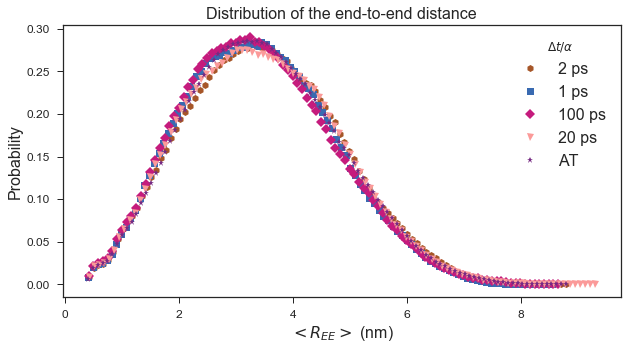

In [19]:
rcParams['figure.figsize'] = 10, 5
avg_ee = []
for r in [p if p == 'AT' else float(p) for p in sorted(map(str, e_e))]:
    rr = 'AT' if r == 'AT' else float(r)
    n, x = np.histogram(np.array(e_e[r]), normed=True, bins=100)
    lbl = r if r == 'AT' else '{} ps'.format(int(dt/float(rr)))
    color = plot_colors[res2color['aa']] if r == 'AT' else plot_colors[res2color[r]]
    marker = res2marker[rr]
    plt.plot(x[1:], n, marker, color=color, label=lbl)
    avg_ee.append(np.average(np.array(e_e[r])))
    print(r, lbl, np.average(np.array(e_e[r])), scipy.stats.sem(e_e[r], ddof=100000))

plt.legend(title=r'$\Delta t / \alpha$')
plt.title('Distribution of the end-to-end distance')
plt.ylabel('Probability')
plt.xlabel(r'$<R_{EE}>$ (nm)')
plt.savefig('pe_e_e.pdf', dpi=300, bbox_inches='tight')
plt.savefig('pe_e_e.png', dpi=300, bbox_inches='tight')

### Radius of gyration

In [10]:
rg = defaultdict(list)
for f in os.listdir('structural_data/'):
    if '_rg' in f:
        if 'ref' in f:
            d = np.loadtxt(os.path.join('structural_data', f))
            rg['AT'].append(d)
        else:
            t = '_'.join(f.split('_')[:2])
            r = test2res[t]
            rg[r].append(np.loadtxt(os.path.join('structural_data/', f)))

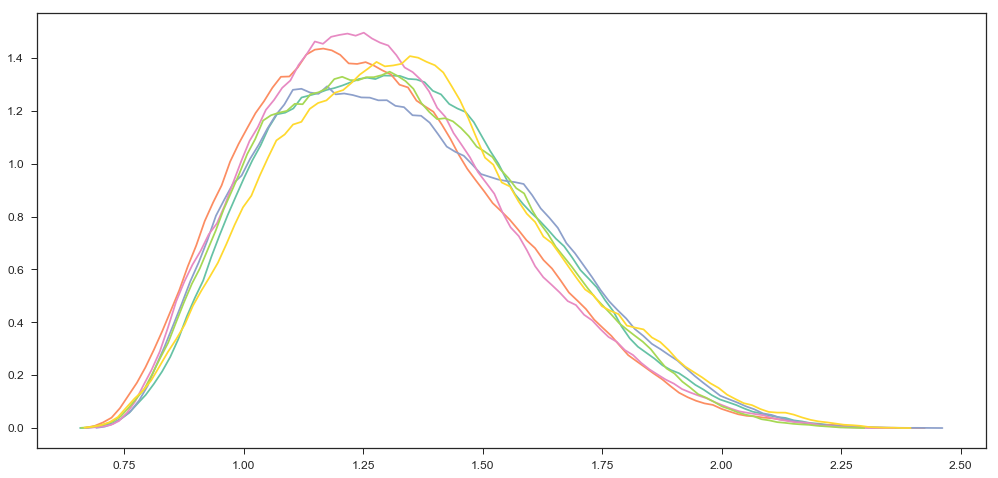

In [11]:
for d in rg['AT']:
    n, x = np.histogram(d, density=True, bins=100)
    plt.plot(x[1:], n)
    dx = np.diff(x)[0]
    s = np.sum(dx*n)

In [12]:
for r in rg:
    rg[r] = [x for v in rg[r] for x in v]

In [13]:
rcParams['figure.figsize'] = 10, 5
avg_rg = []
for r in [p if p == 'AT' else float(p) for p in sorted(map(str, rg))]:
    n, x = np.histogram(rg[r], density=True, bins=100)
    avg_rg.append(np.average(rg[r]))
    lbl = r if r == 'AT' else '{} ps'.format(int(dt/r))
    color = plot_colors[res2color['aa']] if r == 'AT' else plot_colors[res2color[r]]
    marker = res2marker[r]
    plt.plot(x[1:], n, marker, color=color, label=lbl, markevery=5)
    print(r, lbl, np.average(rg[r]), np.std(rg[r], ddof=1), scipy.stats.sem(rg[r], ddof=40000))

xticks = [0.5, 2.5]
xticks.append(np.average(avg_rg))
plt.xticks(xticks)
plt.legend(title=r'$\Delta t / \alpha$')
plt.title('Distribution of the radius of gyration')
plt.ylabel('Probability')
plt.xlim([0.5, 2.5])
plt.xlabel(r'$< R_g>$ distance (nm)')
plt.savefig('pe_rg.pdf', dpi=300, bbox_inches='tight')
plt.savefig('pe_rg.png', dpi=300, bbox_inches='tight')

NameError: name 'res2marker' is not defined

### Internal distance

In [20]:
internal = defaultdict(list)
for f in os.listdir('structural_data/'):
    if '_int' in f and f.endswith('csv'):
        if 'ref' in f:
            internal['AT'].append(np.loadtxt(os.path.join('structural_data', f)))
        else:
            t = '_'.join(f.split('_')[:2])
            r = test2res[t]
            internal[r].append(np.loadtxt(os.path.join('structural_data/', f)))

In [21]:
std_internal = {}
avg_internal = {}
inv_avg_internal = {}
for r in internal:
    avg_internal[r] = np.average(internal[r]/(np.arange(0, 100, 1)*(0.154*0.154)), axis=0)
    inv_avg_internal[r] = np.average(internal[r], axis=0)
    std_internal[r] = np.std(internal[r]/(np.arange(0, 100, 1)*(0.154*0.154)), axis=0)
    print(r, avg_internal[r][-1], std_internal[r][-1])

1e-05 5.52305856591 0.0962612893332
AT 5.80134586904 0.264059851564
0.0005 5.80437828669 0.248518246198
5e-05 5.7433252053 0.101439151474
0.001 5.53816866114 0.0873862622816


/home/teodor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/teodor/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


1e-05 100.0 5.79789177707 0.0375311354144
AT AT 6.02665540001 0.0697421008049
0.0005 2.0 6.06938758359 0.0358749009359
5e-05 20.0 5.99697466962 0.0359165921057
0.001 1.0 5.76644197284 0.0136988103453


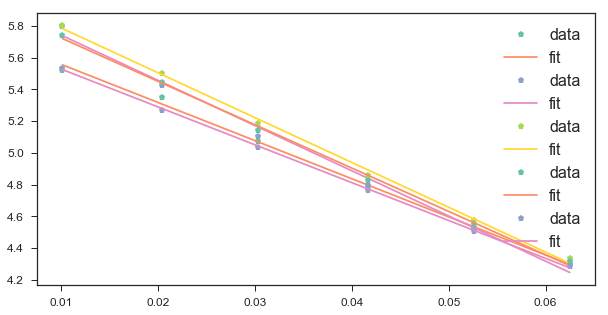

In [22]:
for r in inv_avg_internal:
    yp = dict(zip(range(0, 100), inv_avg_internal[r]))
    xp = np.arange(0.0001, 0.07, 0.01)
    n_xp = map(int,  1.0/xp)
    yv = np.array([(1.0/x, yp[x]/(x*0.154*0.154)) for x in n_xp if x in yp])

    (ref_slope, ref_b), ref_cov = numpy.polyfit(
        yv[:, 0],
        yv[:, 1],
        1,
        cov=True
    )
    err_slope = np.sqrt(ref_cov[0][0])
    err_b = np.sqrt(ref_cov[1][1])
    print(r, r if r == 'AT' else dt/r, ref_b, err_b)
    plt.plot(yv[:, 0], yv[:, 1], 'p', label='data')
    plt.plot(yv[:, 0], ref_slope*yv[:, 0] + ref_b, label='fit')
    plt.legend()

### Combine image

(3000300,)
(3750375,)
(4424700,)
(3000300,)
(8269950,)


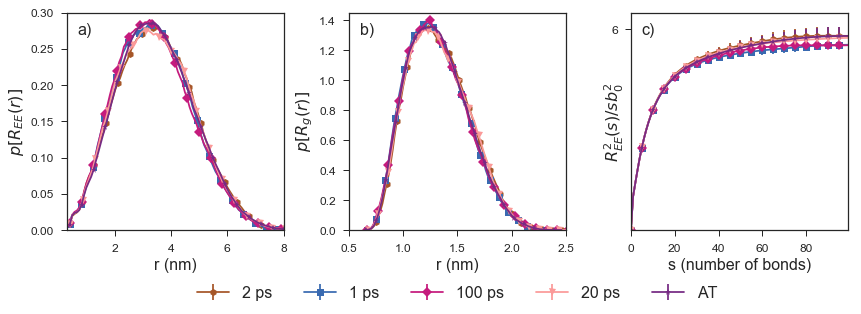

In [26]:
rcParams['figure.figsize'] = 14, 4
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(1, 3)
gs1.update(wspace=0.3, hspace=0.0)
ax1 = fig.add_subplot(gs1[0, 0]) # ee
ax2 = fig.add_subplot(gs1[0, 1]) # rg
ax3 = fig.add_subplot(gs1[0, 2]) # int

# Plot E-E
for r in [p if p == 'AT' else float(p) for p in sorted(map(str, e_e))]:
    n, x = np.histogram(np.array(e_e[r]), density=True, bins=100)
    lbl = r if r == 'AT' else '{} ps'.format(int(dt/r))
    color = plot_colors[res2color['aa']] if r == 'AT' else plot_colors[res2color[r]]
    marker = res2marker[r]
    ax1.plot(x[1:], n, marker, linestyle='-', color=color, label=lbl, markevery=5)

an_11 = ax1.annotate('a)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
# ax1.set_yticks([])
ax1.set_xlim([0.3, 8.0])
ax1.set_ylim([0, 0.3])
ax1.set_xlabel(r'r (nm)')
ax1.set_ylabel(r'$p[R_{EE}(r)]$')

# Plot Rg
for r in [p if p == 'AT' else float(p) for p in sorted(map(str, rg))]:
    print(np.array(rg[r]).shape)
    n, x = np.histogram(np.array(rg[r]), density=True, bins=100)
    lbl = r if r == 'AT' else '{} ps'.format(int(dt/r))
    color = plot_colors[res2color['aa']] if r == 'AT' else plot_colors[res2color[r]]
    marker = res2marker[r]
    ax2.plot(x[1:], n, marker, linestyle='-', color=color, label=lbl, markevery=5)

# an_2 = ax2.annotate(
#     r'$p[R_g(r)]$', 
#     xy=(-0.01, 0.5),  
#     xycoords='axes fraction', 
#     fontsize=fonttitle, 
#     horizontalalignment='right')
an_21 = ax2.annotate('b)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax2.set_xlim([0.5, 2.5])
# ax2.set_yticks([])
ax2.set_ylabel(r'$p[R_g(r)]$')
ax2.set_ylim([0, 1.45])
ax2.set_xlabel(r'r (nm)')

# Internal distance
for r in [p if p == 'AT' else float(p) for p in sorted(map(str, internal))]:
    lbl = r if r == 'AT' else '{} ps'.format(int(dt/r))
    color = plot_colors[res2color['aa']] if r == 'AT' else plot_colors[res2color[r]]
    marker = res2marker[r]
    avg_internal[r][0] = 0
    ax3.errorbar(range(0, 100), avg_internal[r], std_internal[r], 
                 marker=marker, label=lbl, color=color, 
                 markevery=5, linestyle='-', errorevery=5, capthick=1.5)
an_31 = ax3.annotate('c)', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=fonttitle)
ax3.set_xlabel(r's (number of bonds)')
ax3.set_yticks([6.0])
ax3.set_xlim(0, 99)
ax3.set_ylim([0, 6.5])
ax3.set_ylabel(r'$R^2_{EE}(s) / sb_0^2$', labelpad=-15)

lgd = ax3.legend(bbox_to_anchor=(-0.8, -0.39), ncol=5, loc='lower center', frameon=False)
plt.savefig('pe_ee_rg_int.pdf', dpi=300, bbox_inches='tight', bbox_extra_artists=[lgd, an_11, an_21, an_31])
# plt.savefig('pe_ee_rg_int.png', dpi=300, bbox_inches='tight', bbox_extra_artists=[lgd, an_11, an_21, an_31])

# Mean squared displacement and autocorrelation function

**Mean square displacement**

$ \langle MSD(\tau_d) \rangle = \frac{1}{(T-\tau_d)N} \sum_{t=0}^{T-\tau_d} \sum_{i=1}^N |\vec{R}_i(t) - \vec{R}_i(t+\tau_d)|^2$

where $\vec{R}_i(t)$ is the COM of chain $i$ at time $t$.

**Autocorrelation of end-to-end vector**

$C_{EE}(\tau_d) = \frac{1}{C_{EE}(0) M N} \sum_{j=0}^{M} \sum_{i=0}^{N} {\textbf R_i}(t_j) \cdot {\textbf R_i}(t_j+\tau_d) $

where $N$ is a number of chains, $\textbf{R}$ is a end-to-end vector, $M$ is a number of time origins. $M+max(\tau_d) = T$

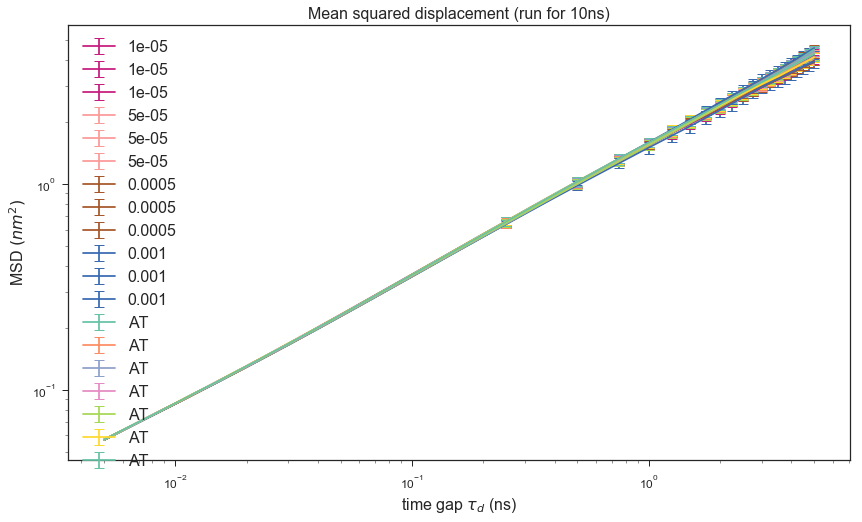

In [14]:
ref_idx = 1
for f in sorted(os.listdir('msd_data/'), key=lambda x: x.replace('.csv', '').split('_')[2:4]):
    if not 'msd' in f or 'com' in f:
        continue
    if 'ref' in f:
        d = np.loadtxt(os.path.join('msd_data', f))
        plt.errorbar(
            d[:, 0]*dt,
            d[:, 1],
            d[:, 2],
            label='AT',
            capthick=1,
            capsize=5,
            errorevery=50)
        ref_idx += 1
    else:
        t = '_'.join(f.split('_')[1:3]).replace('.csv', '')
        d = np.loadtxt(os.path.join('msd_data', f))
        plt.errorbar(
            d[:, 0]*dt, 
            d[:, 1], 
            d[:, 2],
            label=test2res[t], 
            color=plot_colors[res2color[test2res[t]]],
            errorevery=50,
            capthick=1,
            capsize=5
            )

# Plot reference data
plt.title('Mean squared displacement (run for 10ns)')
plt.xlabel(r'time gap $\tau_d$ (ns)')
plt.ylabel(r'MSD $(nm^2)$')
plt.legend(loc=0)
plt.yscale('log')
plt.xscale('log')

In [15]:
rcParams['figure.figsize'] = 14, 8
msd_ref_data = []
msd_std_ref_data = []
msd_res_data = defaultdict(list)
msd_std_res_data = defaultdict(list)
msd_time_column = None
dd_time = None
for f in sorted(os.listdir('msd_data/'), key=lambda x: x.replace('.csv', '').split('_')[1:3]):
    if 'com' in f:
        continue
    if 'ref' in f:
        d = np.loadtxt(os.path.join('msd_data', f))
        msd_ref_data.append(d)
        msd_std_ref_data.append(d[:, 2])
        msd_time_column = d[:, 0]
    elif '.csv' in f:
        t = '_'.join(f.split('_')[1:3]).replace('.csv', '')
        d = np.loadtxt(os.path.join('msd_data', f))
        dd_time = d[:, 0]
        try:
            r = test2res[t]
        except KeyError:
            continue
        msd_res_data[r].append(d)
        msd_std_res_data[r].append(d[:, 2])

avg_msd_ref_data = np.average(np.array(msd_ref_data), axis=0)
avg_msd_std_ref_data = np.sqrt(np.average(np.array(msd_std_ref_data)**2, axis=0)) # /np.sqrt(len(msd_std_ref_data))

avg_msd_res_data = {}
avg_std_msd_res_data = {}
for r in sorted(msd_res_data):
    msd_res_data[r] = np.array(msd_res_data[r])
    avg_msd_res_data[r] = np.average(msd_res_data[r], axis=0)
    avg_std_msd_res_data[r] = np.sqrt(np.average(np.array(msd_std_res_data[r])**2, axis=0))

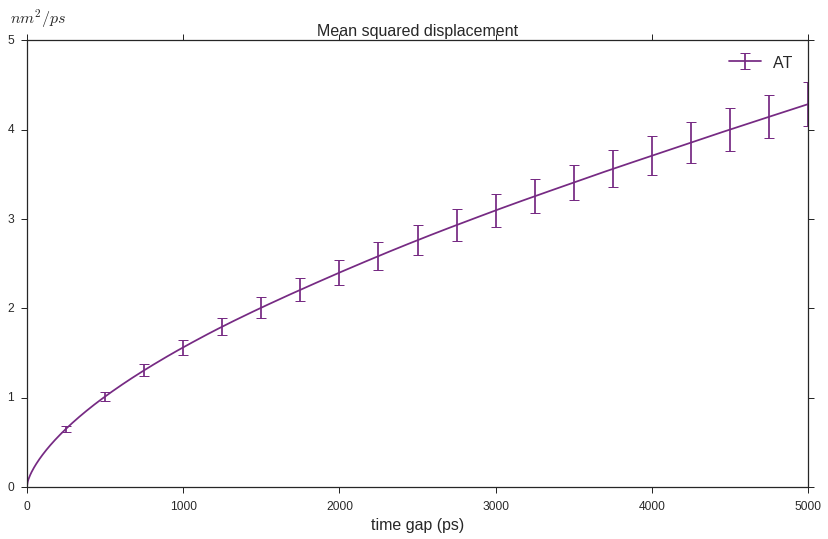

In [52]:
plt.errorbar(
    msd_time_column, 
    avg_msd_ref_data[:, 1], 
    avg_msd_std_ref_data, 
    color=plot_colors[res2color['aa']],
    errorevery=50,
    capthick=1, capsize=5,
    label='AT')
plt.legend(loc=0)
plt.ylim(ymin=0.0)
plt.title(r'Mean squared displacement')
plt.annotate(
    r'$nm^2/ps$', xy=(0.05, 1.04),  xycoords='axes fraction', 
    fontsize=fonttitle, horizontalalignment='right')
plt.xlabel('time gap (ps)')
plt.tick_params(axis='both', which='major')
#plt.savefig('pe_msd.pdf', dpi=300)

## MSD of COM

### diffusion coefficient

In [53]:
from scipy.odr import odrpack as odr
from scipy.odr import models

def poly_lsq(x,y,n,verbose=False,itmax=200):
    ''' Performs a polynomial least squares fit to the data,
    with errors! Uses scipy odrpack, but for least squares.

    IN:
       x,y (arrays) - data to fit
       n (int)      - polinomial order
       verbose      - can be 0,1,2 for different levels of output
                      (False or True are the same as 0 or 1)
       itmax (int)  - optional maximum number of iterations

    OUT:
       coeff -  polynomial coefficients, lowest order first
       err   - standard error (1-sigma) on the coefficients

    --Tiago, 20071114
    '''

    # http://www.scipy.org/doc/api_docs/SciPy.odr.odrpack.html
    # see models.py and use ready made models!!!!

    func   = models.polynomial(n)
    mydata = odr.Data(x, y)
    myodr  = odr.ODR(mydata, func,maxit=itmax)

    # Set type of fit to least-squares:
    myodr.set_job(fit_type=2)
    if verbose == 2: myodr.set_iprint(final=2)

    fit = myodr.run()

    # Display results:
    if verbose: fit.pprint()

    if fit.stopreason[0] == 'Iteration limit reached':
        print '(WWW) poly_lsq: Iteration limit reached, result not reliable!'

    # Results and errors
    coeff = fit.beta[::-1]
    err   = fit.sd_beta[::-1]

    return coeff,err

('Ref', 0.10487674314818698, 0.0010054995517418445)
  Ref    D=0.104876743148 +/- 0.00100549955174 nm^2/ps
0.000104876743148 1.00549955174e-06


<Container object of 3 artists>

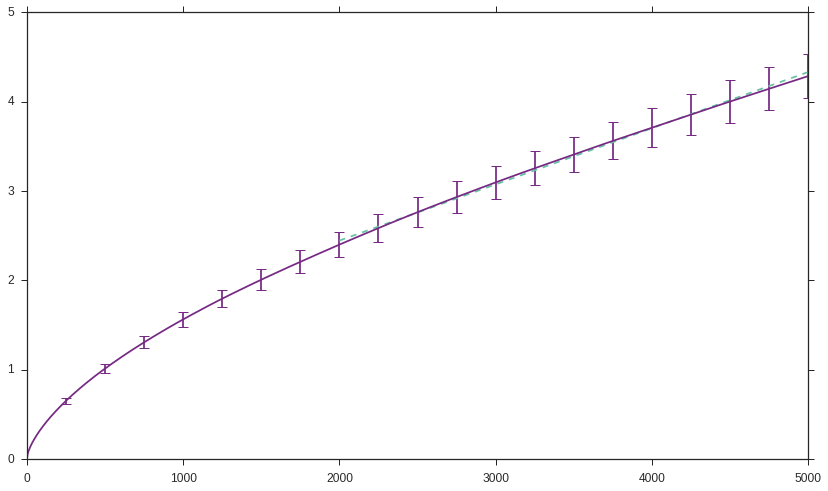

In [54]:
start_fit, stop_fit = 400, 1000
(ref_slope, ref_b), ref_cov = numpy.polyfit(
    msd_time_column[start_fit:stop_fit],
    avg_msd_ref_data[:, 1][start_fit:stop_fit],
    1,
    w=1.0/avg_msd_std_ref_data[start_fit:stop_fit],
    cov=True
)
err_slope = np.sqrt(ref_cov[0][0])
print ('Ref', (ref_slope/6.0)*1000.0, err_slope*1000.0)
print '{:>5}    D={} +/- {} nm^2/ps'.format('Ref', (ref_slope/6.0)*1000.0, err_slope*1000.0)
print ref_slope/6.0, err_slope
model = ref_b + ref_slope*msd_time_column[start_fit:stop_fit]
plt.plot(msd_time_column[start_fit:stop_fit], model,"--",label="model")
plt.errorbar(
    msd_time_column, 
    avg_msd_ref_data[:, 1], 
    avg_msd_std_ref_data, 
    color=plot_colors[res2color['aa']],
    errorevery=50,
    capthick=1, capsize=5,
    label='AT')

In [55]:
start_fit, stop_fit = 400, 1000
d_slopes = defaultdict(list)
err_slopes = defaultdict(list)
for r in msd_res_data:
    for ar in msd_res_data[r]:
        if len(ar) == 0:
            continue
        (d_slope, d_b), b_cov = numpy.polyfit(
            ar[:, 0][start_fit:stop_fit], 
            ar[:, 1][start_fit:stop_fit], 
            1,
            w=1.0/ar[:, 2][start_fit:stop_fit],
            cov=True)
        d_slopes[r].append((d_slope/6.0)*1000.0)
        err_slope = np.sqrt(b_cov[0][0])
        err_slopes[r].append(err_slope*1000.0)
    #print '{} D={:.4f} +/- {:.4f} nm^2/ps'.format(r, (d_slope/6.0)*1000.0, err_slope*1000.0)
# Read reference data also
msd_ref_data = np.array(msd_ref_data)
msd_std_ref_data = np.array(msd_std_ref_data)
r='aa'
for ar in msd_ref_data:
    if len(ar) == 0:
        continue
    (d_slope, d_b), b_cov = numpy.polyfit(
        ar[:, 0][start_fit:stop_fit], 
        ar[:, 1][start_fit:stop_fit], 
        1,
        w=1.0/ar[:, 2][start_fit:stop_fit],
        cov=True)
    d_slopes[r].append((d_slope/6.0)*1000.0)
    err_slope = np.sqrt(b_cov[0][0])
    err_slopes[r].append(err_slope*1000.0)

# Print data.
for r in d_slopes:
    print r if r == 'aa' else dt/r, np.average(d_slopes[r]), np.std(d_slopes[r])

aa 0.10487713521 0.006484021863
100.0 0.0989799589519 0.00675997000563
1.0 0.102101706992 0.00932385484598
2.0 0.0949186660133 0.0135067744714
20.0 0.110242914359 0.00677152305198


  Ref    D=0.1049 +/- 0.00101 nm^2/ns
    2 ps D=0.0953 +/- 0.00108 nm^2/ns
  100 ps D=0.0989 +/- 0.00067 nm^2/ns
   20 ps D=0.1100 +/- 0.00061 nm^2/ns
    1 ps D=0.1022 +/- 0.00130 nm^2/ns


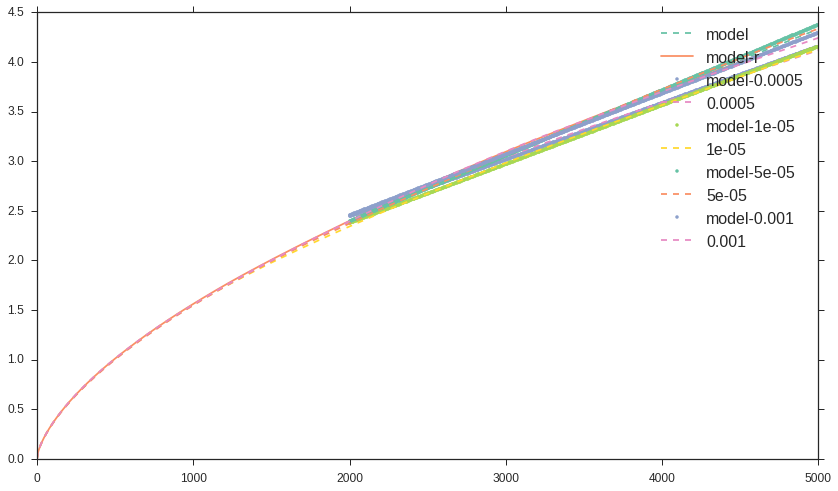

In [56]:
start_fit, stop_fit = 400, 1000
(ref_slope, ref_b), ref_cov = numpy.polyfit(
    msd_time_column[start_fit:stop_fit],
    avg_msd_ref_data[:, 1][start_fit:stop_fit],
    1,
    w=1.0/avg_msd_std_ref_data[start_fit:stop_fit],
    cov=True
)
err_slope = np.sqrt(ref_cov[0][0])
print '{:>5}    D={:.4f} +/- {:.5f} nm^2/ns'.format('Ref', (ref_slope/6.0)*1000.0, err_slope*1000.0)

model = ref_b + ref_slope*msd_time_column[start_fit:stop_fit]
plt.plot(msd_time_column[start_fit:stop_fit], model,"--",label="model")
plt.plot(msd_time_column, avg_msd_ref_data[:, 1], label='model-r')

for r in avg_msd_res_data:
    (d_slope, d_b), b_cov = numpy.polyfit(
        dd_time[start_fit:stop_fit], 
        avg_msd_res_data[r][:, 1][start_fit:stop_fit], 
        1,
        w=1.0/avg_std_msd_res_data[r][start_fit:stop_fit],
        cov=True)
    err_slope = np.sqrt(b_cov[0][0])
    print '{:5.0f} ps D={:.4f} +/- {:.5f} nm^2/ns'.format(dt/r, (d_slope/6.0)*1000.0, err_slope*1000.0)
    model = d_b + d_slope*msd_time_column[start_fit:stop_fit]
    plt.plot(msd_time_column[start_fit:stop_fit], model, '.', label="model-{}".format(r))
    plt.plot(dd_time, avg_msd_res_data[r][:, 1], '--', label=r)
plt.legend()


### ACF and MSD

In [57]:
## ACF
acf_data = defaultdict(list)
std_acf_data = defaultdict(list)
for f in os.listdir('acf_data/'):
    t = '_'.join(f.split('_')[:2])
    r = test2res.get(t, 'aa')
    d = np.loadtxt('acf_data/{}'.format(f), usecols=(0, 1, 2))
    acf_data[r].append(d)

avg_acf_data, std_acf_data = {}, {}
for r in acf_data:
    acf_data[r] = np.array(acf_data[r])
    avg_acf_data[r] = np.average(acf_data[r], axis=0)
    std_acf_data[r] = np.sqrt(np.average(acf_data[r][:,:, 2]**2, axis=0)) #/np.sqrt(len(acf_data[r]))

/home/teodor/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


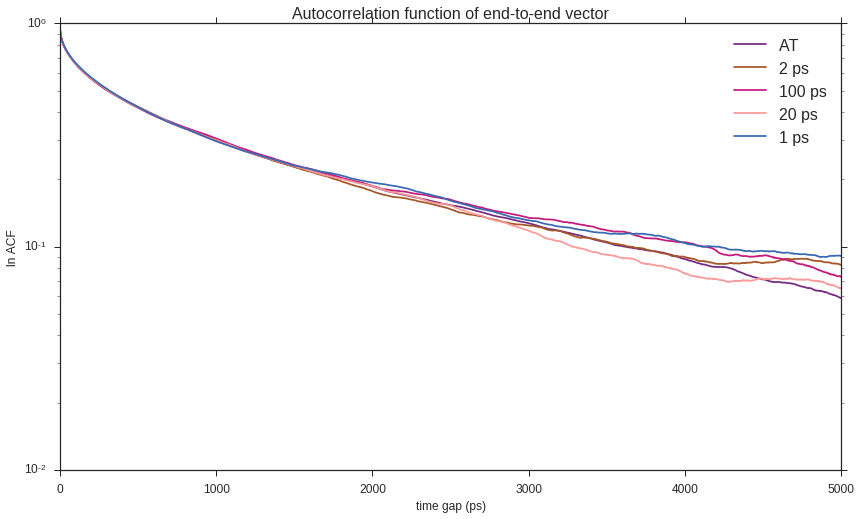

In [58]:
plt.yscale('log')
plt.title('Autocorrelation function of end-to-end vector', fontsize=fonttitle)
plt.legend(title=r'$\Delta t / \alpha$')
plt.ylabel('ln ACF', fontsize=fontother)
plt.xlabel(r'time gap (ps)', fontsize=fontother)
for r in avg_acf_data:
    lbl = 'AT' if r == 'aa' else '{:.0f} ps'.format(dt/r).rstrip('0')
    plt.plot(
        avg_acf_data[r][:, 0], 
        avg_acf_data[r][:, 1], 
        color=plot_colors[res2color[r]],
        label=lbl)
plt.legend()
plt.savefig('pe_acf_log.pdf', dpi=300, bbox_inches='tight')

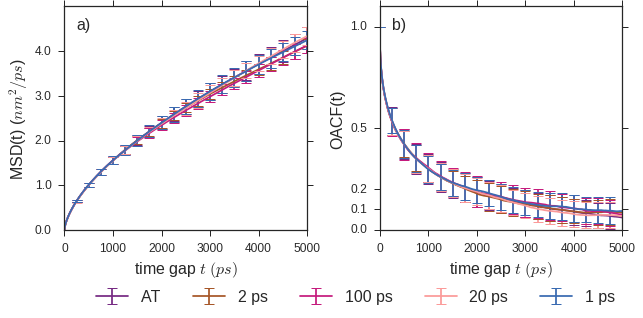

In [59]:
rcParams['figure.figsize'] = 10, 4
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(1, 2)
gs1.update(wspace=0.3, hspace=0.0)
ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])

## Plot MSD
an_1 = ax1.annotate(r'a)', xy=(0.05, 0.9),  xycoords='axes fraction', fontsize=fonttitle)
ax1.errorbar(
    msd_time_column,
    avg_msd_ref_data[:, 1], 
    avg_msd_std_ref_data,
    color=plot_colors[res2color['aa']],
    label='AT',
    capthick=1, capsize=5,
    errorevery=50
    )

msd_res_avg_data = {}
for r in msd_res_data:
    ax1.errorbar(
        dd_time, 
        avg_msd_res_data[r][:, 1], 
        avg_std_msd_res_data[r], 
        capthick=1, capsize=5,
        errorevery=50,
        label='{}'.format(r),
        color=plot_colors[res2color[r]]
        )
ax1.set_yticks([0.0, 1.0, 2.0, 3.0, 4.0])
ax1.set_yticklabels(map('{:.1f}'.format, ax1.get_yticks()))
ax1.set_ylim([0.01, 5.0])
ax1.set_xlabel(r'time gap $t \; (ps)$')
ax1.set_ylabel(r'MSD(t) ($nm^2 / ps$)')

## Plot ACF
an_2 = ax2.annotate(r'b)', xy=(0.05, 0.9),  xycoords='axes fraction', fontsize=fonttitle)
for r in avg_acf_data:
    lbl = 'AT' if r == 'aa' else '{:.0f} ps'.format(dt/r).rstrip('0')
    ax2.errorbar(
        avg_acf_data[r][:, 0], 
        avg_acf_data[r][:, 1], 
        std_acf_data[r],
        color=plot_colors[res2color[r]],
        label=lbl,
        capthick=1, capsize=5,
        errorevery=250,
    )
ax2.set_xlabel(r'time gap $t \; (ps)$')
ax2.set_ylabel('OACF(t)')
ax2.set_ylim([0.0, 1.1])
ax2.set_yticks([0.0, 0.1, 0.2, 0.5, 1.0])
lgd = ax2.legend(bbox_to_anchor=(-0.1, -0.4), ncol=5, loc='lower center', frameon=False)
plt.savefig('pe_dynamical.pdf', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')
plt.savefig('pe_dynamical.png', dpi=300, bbox_extra_artists=[lgd, an_1, an_2], bbox_inches='tight')

# OACF fit

-0.000431068118078 -0.73971926958 8.33206531182e-07 0.00242930552883
2319.81897538
A0 0.477247874713


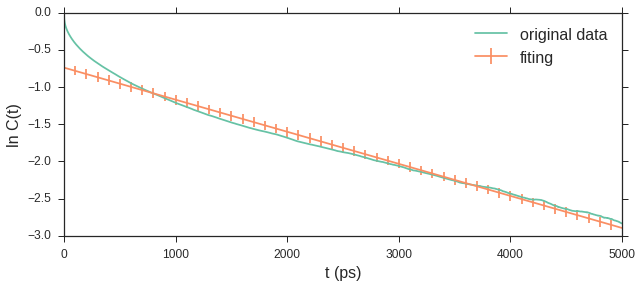

In [60]:
aa_t = avg_acf_data['aa'][:, 0]
aa_acf = np.log(avg_acf_data['aa'][:, 1])
plt.plot(aa_t, aa_acf, label='original data')

start_fit, stop_fit = 100, 5000
(ref_slope, ref_b), (err_slope, err_b) = poly_lsq(aa_t[start_fit:stop_fit], aa_acf[start_fit:stop_fit], 1)
model = ref_b + ref_slope*aa_t
plt.errorbar(aa_t, model, std_acf_data[r], errorevery=100, label='fiting')
plt.ylabel('ln C(t)')
plt.xlabel('t (ps)')
print ref_slope, ref_b, err_slope, err_b
tau_d = -1/ref_slope
print tau_d
print 'A0', np.exp(ref_b)
plt.legend()
plt.savefig('pe_acf_fiting.pdf', dpi=300, bbox_inches='tight')

2.59751985698 0.32644738847


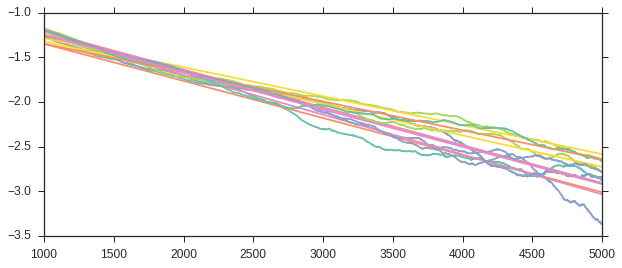

In [61]:
d_slopes = []
for ddd in acf_data['aa']:
    start_fit, stop_fit = 1000, 5000
    plt.plot(ddd[:, 0][start_fit:stop_fit], np.log(ddd[:, 1][start_fit:stop_fit]))
    x = ddd[:, 0][start_fit:stop_fit]
    y = np.log(ddd[:, 1][start_fit:stop_fit])
    (a_s,b_s,r,tt,stderr) = scipy.stats.linregress(x, y)
    line = a_s*x + b_s
    plt.plot(x, line)
    #print -1.0/a_s/1000.0, np.exp(stderr)/1000.0
    d_slopes.append(-1.0/a_s/1000.0)
print np.average(d_slopes), np.std(d_slopes)

In [62]:
start_fit, stop_fit = 1000, 5000
d_slopes = defaultdict(list)
for r in acf_data:
    for ar in acf_data[r]:
        x = ar[:, 0][start_fit:stop_fit]
        y = np.log(ar[:, 1][start_fit:stop_fit])
        (d_slope, d_b, _, _, err_slope) = scipy.stats.linregress(x, y)
        d_slopes[r].append(-1.0/d_slope/1000.0)
        model = d_b + d_slope*x
        #plt.plot(x, y)
        #plt.plot(x, model)
for r in d_slopes:
    print('{} {:.4f} {:.4f}'.format(
            r if r == 'aa' else dt/r, 
            np.average(d_slopes[r]), 
            np.std(d_slopes[r])))

aa 2.5975 0.3264
2.0 3.0733 0.2330
100.0 3.1851 0.6891
20.0 2.5153 0.3466
1.0 3.4392 0.7022


# PE poster

KeyError: 'xvg'

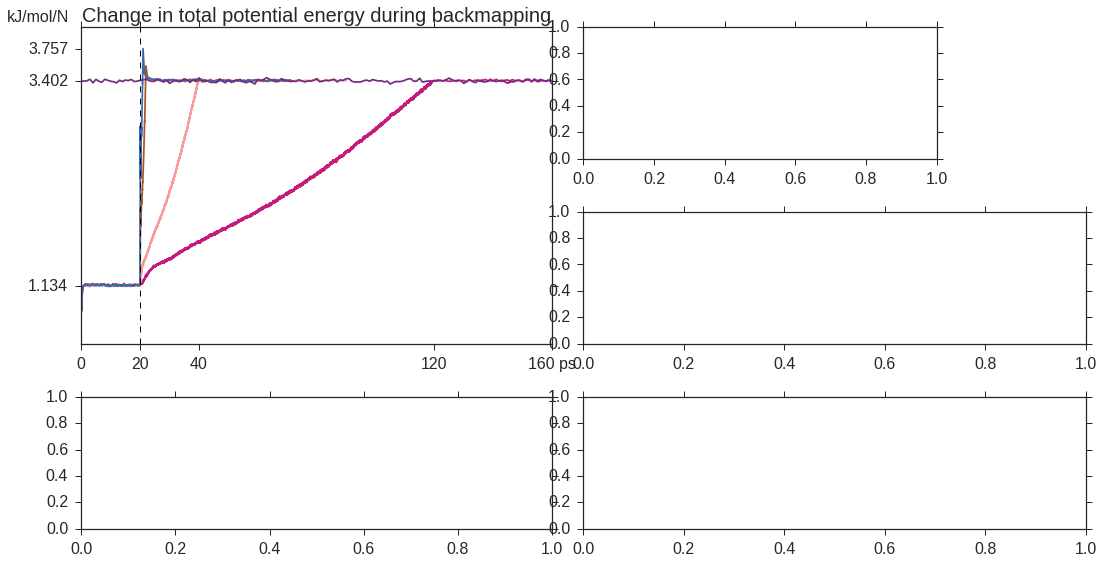

In [63]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set(style='ticks', palette='muted')

fonttitle=20
fontother=16

rcParams.update({'font.size': fontother, 
                 'legend.fontsize': fontother, 
                 'axes.titlesize': fonttitle,
                 'axes.labelsize': fonttitle,
                 'xtick.labelsize': fontother, 
                 'ytick.labelsize': fontother,
                 })

rcParams['figure.figsize'] = 18, 9
fig = plt.figure(figsize=rcParams['figure.figsize'])
gs1 = gridspec.GridSpec(3, 3, width_ratios=[2,1.5,0.5])
gs1.update(wspace=0.1, hspace=0.4)
ax1 = fig.add_subplot(gs1[0:2,0:1])
ax2 = fig.add_subplot(gs1[0, 1])
ax3 = fig.add_subplot(gs1[1, 1:3])
ax4 = fig.add_subplot(gs1[2, 0:1])
ax5 = fig.add_subplot(gs1[2, 1:3])

# Potential energy
ax1.annotate('kJ/mol/N', xy=(-0.025, 1.015),  xycoords='axes fraction', horizontalalignment='right')

yticks = []
y_max = 0.0
for r in valid_res:
    data = np.sum(avg_res_data[r][:, csv_cols['Epot']], axis=1)
    ax1.plot(avg_res_data[r][:,0]*dt,  data, color=plot_colors[res2color[r]],
             label='{} ps'.format(dt/r).rstrip('0'))
    y_max = max(y_max, np.max(data))

yticks.append(y_max)
yticks.append(np.average(np.sum(avg_res_data[0.00005][:, csv_cols['Epot']], axis=1)[:100]))

ax1.set_xlim(0, 160)
ref_data_epot = np.sum(ref_data[:, ref_cols['Epot']][200:360], axis=1)
yticks.append(np.average(ref_data_epot))
ax1.plot(
    ref_data[:, 0][:160]*dt, 
    ref_data_epot,
    color=plot_colors[res2color['aa']],
    label='AT'
    )
ax1.axvline(x=20.0, linestyle='--', linewidth=1.0, color='k')
ax1.set_xticks([
        0.0,
        20.0,
        20.0 + dt/0.00001,
        20.0 + dt/0.00005,
        160.0
    ])
ax1.set_xticklabels([0, 20, 20 + int(dt/0.00001), 20 + int(dt/0.00005), '160 ps'])
ax1.set_yticks(yticks)
ax1.set_title('Change in total potential energy during backmapping')

# RDF
for f in struct_data:
    t = f.split('.')[-1]
    if 'A-A' in f and 'test' in f:
        ax2.plot(struct_data[f][:, 0], struct_data[f][:, 1],
                 color=plot_colors[res2color[test2res[t]]])
ax2.plot(struct_data['A-A.l20'][:, 0], struct_data['A-A.l20'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax2.tick_params(axis='both', which='major')
ax2.set_yticks([1.0])
ax2.set_xticks([0.35, 1.4])
ax2.set_xticklabels([0.35, '1.4 nm'])
ax2.set_xlim([0.3, 1.4])
ax2.set_title('Radial distribution')

# Bonds
for f in struct_data:
    t = '_'.join(f.split('_')[1:]).replace('.xvg', '')
    if 'bond' in f and 'test' in f:
        ax3.plot(struct_data[f][:, 0], struct_data[f][:, 1],
                 color=plot_colors[res2color[test2res[t]]])
ax3.plot(struct_data['bond_ref.xvg'][:, 0], struct_data['bond_ref.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']])
ax3.set_xlim(0.135, 0.17)
ax3.tick_params(axis='both', which='major')
ax3.set_yticks([])
ax3.set_xticks([0.154])
ax3.set_xticklabels(['0.154 nm'])
ax3.set_title('Bond distribution')

# Angles
for f in struct_data:
    t = '_'.join(f.split('_')[1:]).replace('.xvg', '')
    if 'angle' in f and 'test' in f:
        ax4.plot(np.rad2deg(struct_data[f][:, 0]), struct_data[f][:, 1],
                 color=plot_colors[res2color[test2res[t]]])
ax4.plot(np.rad2deg(struct_data['angle_ref.xvg'][:, 0]), struct_data['angle_ref.xvg'][:, 1], 'p',
                    color=plot_colors[res2color['aa']])
ax4.set_yticks([])
ax4.set_xlim([96, 130])
ax4.set_xticks([114.0])
ax4.tick_params(axis='both', which='major')
ax4.set_xticklabels(map(r'${}^\circ$'.format, [114.0]))
ax4.set_title('Angle distribution')

# Dihedral
for f in sorted(struct_data):
    t = '_'.join(f.split('_')[1:]).replace('.xvg', '')
    if 'dih' in f and 'test' in f:
        ax5.plot(np.rad2deg(struct_data[f][:, 0]), struct_data[f][:, 1],
                 color=plot_colors[res2color[test2res[t]]],
                 label='{} ps'.format(int(dt/test2res[t])))
ax5.plot(np.rad2deg(struct_data['dihedral_ref.xvg'][:, 0]), struct_data['dihedral_ref.xvg'][:, 1], 'p',
         color=plot_colors[res2color['aa']],
         label='AT')
ax5.set_yticks([])
ax5.set_xlim([-150, 150])
ax5.set_xticks([0.0])
ax5.tick_params(axis='both', which='major')
ax5.set_xticklabels(map(r'${}^\circ$'.format, ax5.get_xticks()))
ax5.set_title('Dihedral distribution')

lgd = ax5.legend(bbox_to_anchor=(0.0, -0.6), ncol=5, loc='lower center', frameon=True)
plt.savefig('pe-poster_plots.pdf', dpi=300, bbox_extra_artist=[lgd], bbox_inches = 'tight', pad_inches = 0)

# Other data

## Pressure

In [ ]:
ref_pressure_files = np.array([
        np.loadtxt(os.path.join('structural_data/', f))[:, 1] 
        for f in os.listdir('structural_data/') 
        if 'pressure' in f and 'ref' in f])

In [ ]:
ref_pressure = ref_pressure_files * 16.6054
print('Reference average pressure: {}'.format(np.average(ref_pressure)))
print('Std Err: {}'.format(np.std(ref_pressure, ddof=1) / np.sqrt(ref_pressure.shape[0])))

In [ ]:
res_pressure_files = defaultdict(list)
for f in os.listdir('structural_data/'):
    if 'test_' in f and 'pressure' in f:
        t = '_'.join(f.split('_')[:2])
        res_pressure_files[test2res[t]].append(np.loadtxt(os.path.join('structural_data/', f))[:, 1])
res_pressure_files = {k: np.array(v) * 16.6054 for k, v in res_pressure_files.iteritems()}
for r, v in res_pressure_files.iteritems():
    print('res {}: P={}, Std={}'.format(r, np.average(v), np.std(v)))

## Density

In [ ]:
ref_densities = np.array([489.882822429, 490.169320665, 490.244573126, 490.131949023, 490.026449657])*1.6605402
print('Avg ref density = {}'.format(np.average(ref_densities)))
print('Std ref density = {}'.format(np.std(ref_densities, ddof=1)))

In [ ]:
res_densities = {
    'test_1': np.array([490.17771597, 490.219965188, 490.261424005])*1.6605402,
    'test_2': np.array([490.321973631, 490.098087443, 490.1003718])*1.6605402,
    'test_3': np.array([489.973629564, 490.096232601,  490.148417809])*1.6605402,
    'test_4': np.array([490.128225049, 490.312040048, 490.096229444])*1.6605402,
}
avg_res_densities = {test2res[k]: np.average(v) for k, v in res_densities.iteritems()}
std_res_densities = {test2res[k]: np.std(v) for k, v in res_densities.iteritems()}
for r in sorted(avg_res_densities):
    v = avg_res_densities[r]
    print('res {}: rho={} Std={}'.format(r, v, std_res_densities[r]))

### Block average calculations

In [ ]:
volume_files = {f: np.loadtxt(os.path.join('density_data/', f)) for f in os.listdir('density_data/')}

In [ ]:
group_volume_files = defaultdict(list)
for f, d in volume_files.iteritems():
    t = 'AT' if 'ref' in f else test2res['_'.join(f.split('_')[:2])]
    group_volume_files[t].append(d)

In [ ]:
block_size = 60

In [ ]:
mass_tot = 105353.69999999995*1.6605402  # Total mass converted to kg/mol
avg_group_density = {}
std_group_density = {}
for f in group_volume_files:
    d = np.array([x for xf in group_volume_files[f] for x in xf])
    avg_group_density[f] = mass_tot/np.average(d)
    vrs = []
    for d in group_volume_files[f]:
        var = np.var(d) / float((d.shape[0]/block_size))
        vrs.append(var)
    std_group_density[f] = np.sqrt(np.average(vrs))

In [ ]:
for v, d in avg_group_density.items():
    print '{} {:.2f} {:.4f}'.format(v, d, std_group_density[v])
    plt.errorbar(1, d, std_group_density[v], markeredgewidth=5.0, capthick=5.0, markersize=5.0, label=v)
plt.xlim([0.98, 1.02])
plt.legend()